# Data Analysis

In [1]:
#import the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import sobel

In [2]:
#Links to the image dataset and the metadata csv

img_link ='dataverse_files/HAM10000_images/'
csv_link = 'dataverse_files/HAM10000_metadata.csv'

In [3]:
#read the metadata
metadata = pd.read_csv(csv_link)
metadata.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,vidir_modern
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,vidir_modern


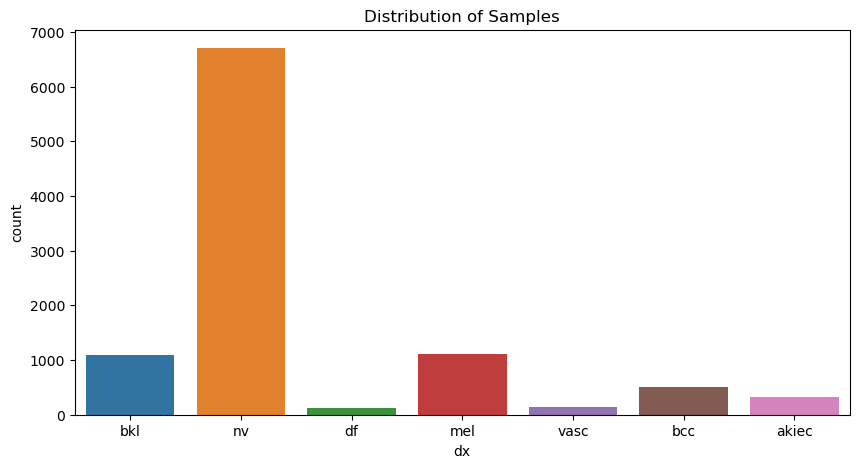

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [4]:
# dx column contains the skin lesion classification. 
# classe distribution in the metadata file
plt.figure(figsize=(10,5))
sns.countplot(x='dx', data=metadata)
plt.title('Distribution of Samples')
plt.show()
metadata['dx'].value_counts()

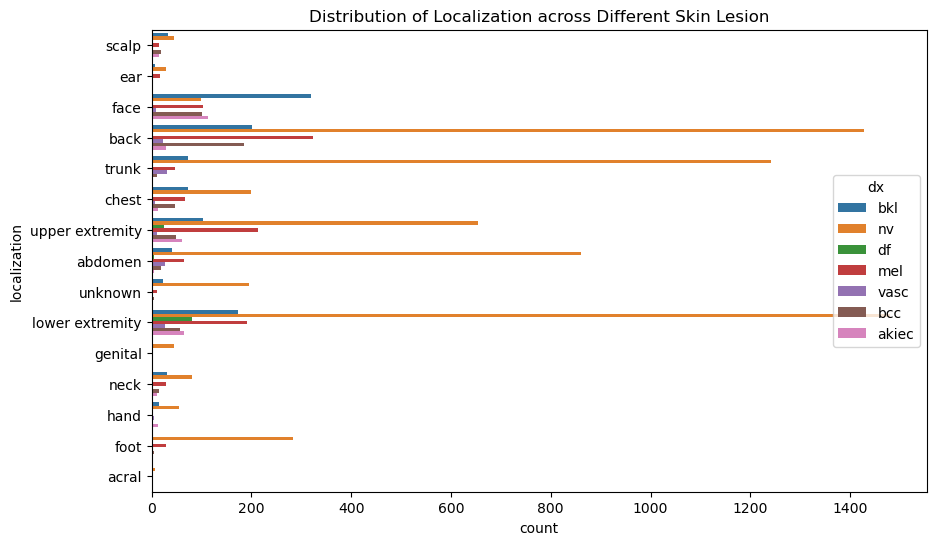

In [7]:
# classes distribution with localization column
plt.figure(figsize=(10,6))
sns.countplot(y='localization', hue='dx', data=metadata)
plt.title('Distribution of Localization across Different Skin Lesion')
plt.show()

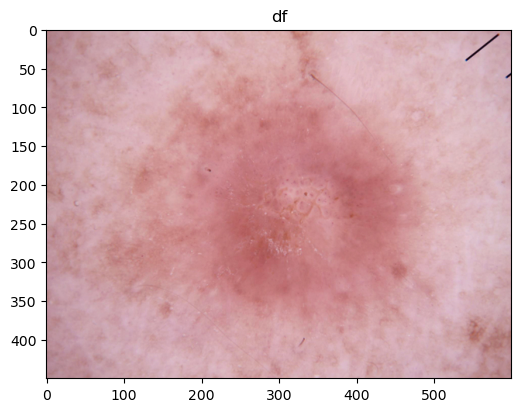

(450, 600, 3)


In [4]:
# display random image from dataset
img_index = np.random.randint(0, len(metadata))
img_path = metadata['image_id'][img_index] + '.jpg'
img = io.imread(img_link + img_path)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(metadata['dx'][img_index])
plt.show()
print(img.shape)

Image ID: ISIC_0031295
Lesion Class: mel
Age: 50.0
Gender: male
Localisation: upper extremity
Image Dimensions: (450, 600, 3)


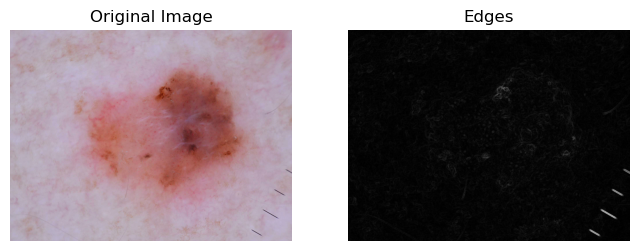

In [4]:
# display random image with its metadata and dimension

index = np.random.randint(0, len(metadata))
img_path = metadata['image_id'][index] + '.jpg'
img = io.imread(img_link + img_path)
    
# converting the image to grayscale and calculating its edges
gray_img = rgb2gray(img)
edges = sobel(gray_img)
    
# plotting the original image and its edges
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edges')
ax[1].axis('off')
    
# displaying the image metadata
print('Image ID:', metadata['image_id'][index])
print('Lesion Class:', metadata['dx'][index])
print('Age:', metadata['age'][index])
print('Gender:', metadata['sex'][index])
print('Localisation:', metadata['localization'][index])
    
# displaying the dimensions of the image
print('Image Dimensions:', img.shape)



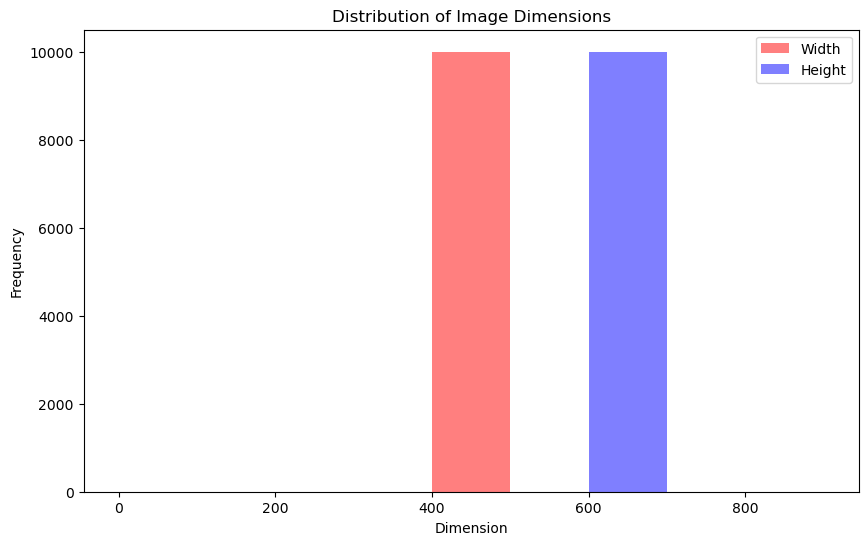

In [7]:
# image Dimension distribution barchart
width = []
height = []

for i in range(len(metadata)):
    img_path = metadata['image_id'][i] + '.jpg'
    img = io.imread(img_link + img_path)
    w, h = img.shape[:2]
    width.append(w)
    height.append(h)
    
plt.figure(figsize=(10,6))
plt.hist(width, bins=range(0, 1000, 100), alpha=0.5, color='red', label='Width')
plt.hist(height, bins=range(0, 1000, 100), alpha=0.5, color='blue', label='Height')
plt.title('Distribution of Image Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [4]:
sample_data = metadata.sample(n=100, random_state=1)

red_channel = []
green_channel = []
blue_channel = []
pixel_intensities = []
for i in range(len(sample_data)):
    img_path = sample_data['image_id'].iloc[i] + '.jpg'
    img = io.imread(img_link + img_path)
    pixel_intensities.extend(list(img.flatten()))
    red_channel.extend(list(img[:,:,0].flatten()))
    green_channel.extend(list(img[:,:,1].flatten()))
    blue_channel.extend(list(img[:,:,2].flatten()))
    


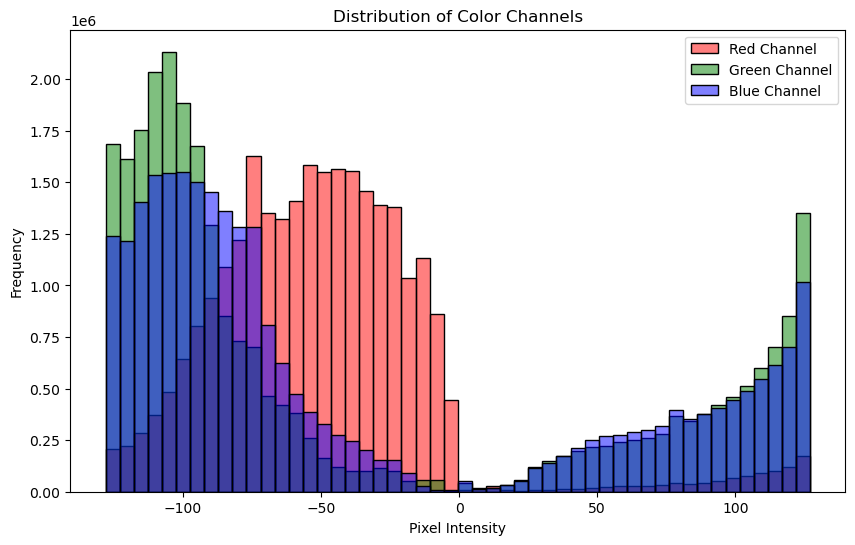

In [5]:
#distribution of RGB colours with pixel intensity
plt.figure(figsize=(10,6))
sns.histplot(red_channel, bins=50, color='red', alpha=0.5, label='Red Channel')
sns.histplot(green_channel, bins=50, color='green', alpha=0.5, label='Green Channel')
sns.histplot(blue_channel, bins=50, color='blue', alpha=0.5, label='Blue Channel')
plt.title('Distribution of Color Channels')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

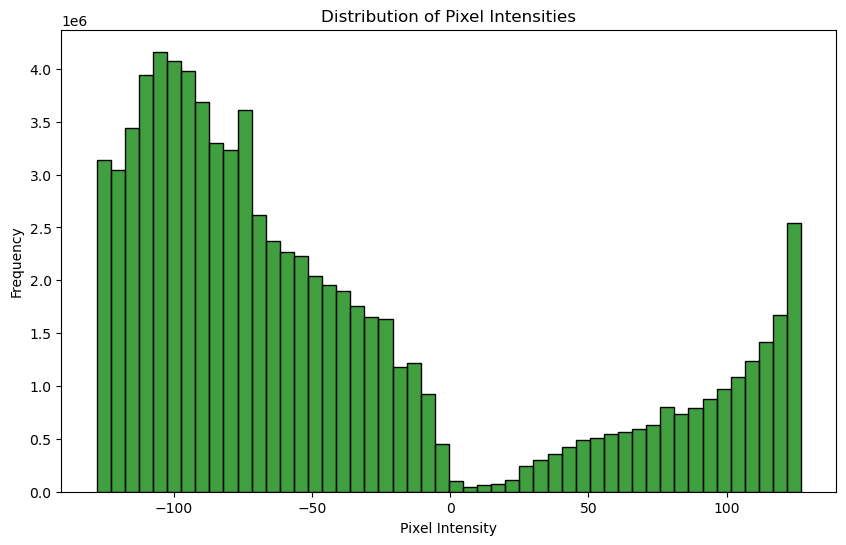

In [6]:
#distribution of  pixel intensitis
plt.figure(figsize=(10,6))
sns.histplot(pixel_intensities, bins=50, color='green')
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()